# Classifying breast cancer molecular subtype using gene expression data


**In this exercise, we will use gene expression data of 173 mutation driver genes associated with breast cancer to predict its molecular subtype using multiclass classification.**

<br>

The exercise has been split into the following parts:

***Part 1***: Set up and exploratory data analysis - this includes loading the data, libraries and getting a better understanding of the data

***Part 2***: Building a lasso regression model and understanding how the penalisation parameter alpha can be found through cross-validation

***Part 3***: Building a random forest classifier to predict cancer subtype, tuning hyperparameters with cross validation, evaluating model performance and outputting the most important features

***Part 4***: Building an XGBoost classifier, tuning hyperparameters and identifying most important features


<br>

In this exercise we'll learn how to use:

- lasso regression
- random forest
- xgboost

## Part 1: Set up and exploratory data analysis

**Exercise 1.1** Load the libaries to be used - numpy, matplolib, pandas and sklearn

**Exercise 1.2** Load the gene expression data, saving it as a variable and output the first
             10 rows  
             (This name of the file is "MTBC_Breast_Cancer.csv")

In [1]:
#1.1 Load the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#1.2 Load the data and output the first 10 rows
gene_exp = pd.read_csv("MTBC_Breast_Cancer.csv",sep='\t')

gene_exp.head(10)

,Sample Identifier,ER Status,HER2 Status,PR Status,Pam50 + Claudin-low subtype,ACVRL1,AFF2,AGMO,AGTR2,AHNAK,...,THADA,THSD7A,TP53,TTYH1,UBR5,USH2A,USP28,USP9X,UTRN,ZFP36L1
0,MB-0000,Positive,Negative,Negative,claudin-low,2.8018,0.9356,0.3067,-0.8504,1.8229,...,0.8474,4.0070,0.3481,2.0412,-1.5903,-1.0283,-0.0265,-0.0654,1.6603,0.3433
1,MB-0002,Positive,Negative,Positive,LumA,-1.8067,0.4817,-0.9456,-1.8446,1.6662,...,-0.5858,-0.6132,-0.0176,-0.7278,0.5215,-1.3180,0.1930,0.3214,0.1909,1.4831
2,MB-0005,Positive,Negative,Positive,LumB,-1.1869,0.0417,0.1168,0.9700,-0.0187,...,-1.4430,-1.3823,0.5126,-0.3872,0.5039,0.0779,2.3398,0.0411,-0.5709,2.7944
3,MB-0006,Positive,Negative,Positive,LumB,-1.7275,-0.2383,0.4058,1.4637,0.3075,...,-1.2363,0.2257,1.6748,-0.3071,1.6148,0.4038,1.5291,0.3613,-0.1076,2.0545
4,MB-0008,Positive,Negative,Positive,LumB,-0.8278,0.9725,0.9789,0.8657,-0.7646,...,-0.3349,-0.2765,0.3461,-0.1481,3.1054,-0.0013,-1.1404,0.6028,-0.7553,-0.0943
5,MB-0010,Positive,Negative,Positive,LumB,-0.2928,0.4498,-1.5594,-1.2046,0.3134,...,0.7349,-0.5363,-1.9502,-0.5007,0.3851,0.6921,-0.1630,-0.1507,0.0531,0.3152
6,MB-0014,Positive,Negative,Positive,LumB,-0.4881,0.8056,0.1276,0.3097,0.2816,...,-2.9184,0.4022,-0.5173,-0.3617,1.1951,0.3073,0.6322,-0.8498,-0.2708,2.0346
7,MB-0020,Negative,Negative,Negative,Normal,1.4061,0.7822,-0.0682,-0.2505,0.1113,...,-0.3789,1.0815,-0.4536,0.1065,-0.1990,-0.8381,-0.7641,0.2345,0.5474,0.2053
8,MB-0022,Positive,Negative,Negative,claudin-low,0.1605,0.3599,1.3598,0.8040,-0.4784,...,-1.9817,1.0986,-0.0853,-0.0966,2.4955,0.6978,0.9179,-0.8934,-1.1711,2.7166
9,MB-0028,Positive,Negative,Negative,LumB,-1.4534,1.5150,-0.4839,1.2135,-0.4467,...,-0.6995,0.7623,0.0521,-0.5370,2.8367,5.5288,0.1575,-0.8704,-1.3340,-0.8548


**Exercise 1.3** Look at the data dimensions and check for missing values in the data

In [3]:
gene_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Columns: 178 entries, Sample Identifier to ZFP36L1
dtypes: float64(173), object(5)
memory usage: 2.7+ MB


In [4]:
#Check for any missing values 
gene_exp.isna().any().any()

False

**Exercise 1.4** 

i. Rename the outcome variable to "Cancer_Subtype"

ii. Convert the outcome variable to categorical data type

iii. Replace the "claudin-low" subtype to "claudinlow" removing the '-' symbol

iv. Output the different labels for the cancer subtype category

In [5]:
#Rename the y variable column
gene_exp.rename(columns = {'Pam50 + Claudin-low subtype':'Cancer_Subtype'}, inplace=True)

#Converting the cancer subtype variable to categorical
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].astype('category')

#Replace the claudin-low subtype to compatible formatting
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].cat.rename_categories({'claudin-low':'claudinlow'})

gene_exp['Cancer_Subtype'].unique()

['claudinlow', 'LumA', 'LumB', 'Normal', 'Her2', 'Basal', 'NC']
Categories (7, object): ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudinlow']

**Exploratory Data Analysis (EDA)** - this allows us to get a greater understanding of the dataset, and a variety of methods can be used to explore any relationships between variables in the dataset, as well as its distribution and features.

**Exercise 1.5** Create a pivot table showing ER/HER2/PR status by the Pam50 + Claudin-low subtype

In [7]:
pd.pivot_table(gene_exp, values="Sample Identifier", index=["ER Status", "HER2 Status", "PR Status"], 
               columns=["Cancer_Subtype"], aggfunc='count', fill_value=0)

Cancer_Subtype                   Basal  Her2  LumA  LumB  NC  Normal  \
ER Status HER2 Status PR Status                                        
Negative  Negative    Negative     157    30     3     0   0      11   
                      Positive       3     2     0     0   0       4   
          Positive    Negative      18    94     1     0   0       8   
                      Positive       2     3     0     0   0       0   
Positive  Negative    Negative      14    34   146   150   2      35   
                      Positive      13    30   530   280   4      84   
          Positive    Negative       2    16    11    26   0       4   
                      Positive       0    15     9    19   0       2   

Cancer_Subtype                   claudinlow  
ER Status HER2 Status PR Status              
Negative  Negative    Negative          119  
                      Positive            6  
          Positive    Negative           13  
                      Positive            0  
Positive  Negative    Negative           44  
                      Positive           32  
          Positive    Negative            2  
                      Positive            2

**Exercise 1.6** Plot a pie chart illustrating the different percentages of the Pam50 +
                Claudin-low cancer subtypes
                
                [Hint: use the groupby function to aggregate the data]

<AxesSubplot:title={'center':'Types of Breast Cancer'}, ylabel='Cancer_Subtype'>

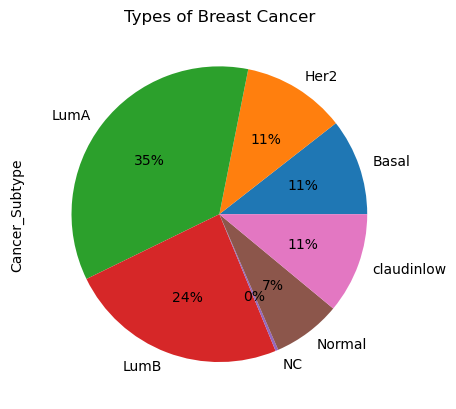

In [9]:
#Pie chart of cancer subtype cases
y_count = gene_exp.groupby(["Cancer_Subtype"])["Cancer_Subtype"].count()
y_count.plot(kind='pie', y="Cancer_Subtype", autopct='%1.0f%%', title='Types of Breast Cancer')

**Exercise 1.7** Explore the correlation between the predictors by constructing a 
correlation plot

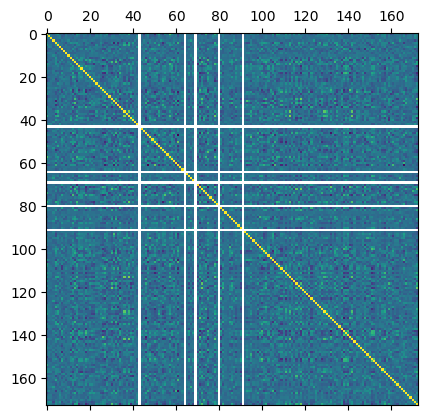

In [11]:
#Correlation between different genes 
plt.matshow(gene_exp.drop(['Cancer_Subtype','ER Status','HER2 Status','PR Status','Sample Identifier'], 
                      axis=1).astype('float64').corr())
plt.show()

## Part 2: Lasso regression

Lasso regression is similar to ordinary linear regression except it employs a penalisation term, alpha, to reduce the complexity of the model to avoid overfitting. The advantage of using lasso is that it can identify which variables are most important in predicting the outcome and can help to construct a simpler model.

<br>
<br>

**Step 1:** Prepare and separate the dataset into predictors and outcome.

<br>

**Exercise 2.1** Create a separate variable for the outcome only

**Exercise 2.2** Create dummy variables for the outcome variable as it contains multiple categories and output the first few rows of this variable

In [12]:
#Create a variable containing outcome only
y=gene_exp['Cancer_Subtype']

#Create dummy variables for y as it contains multiple categories (this is easier for the algorithm to handle)
y = pd.get_dummies(y)
y.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


**Exercise 2.3** Create dummy variables for the categorical predictors and save this into a new variable

In [13]:
#Create dummy variables for categorical predictors
X_dummies = pd.get_dummies(gene_exp[['ER Status','HER2 Status','PR Status']])
X_dummies.head()

,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,PR Status_Negative,PR Status_Positive
0,0,1,1,0,1,0
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,0,1,1,0,0,1


**Exercise 2.4** Create a new variable that contains only the numerical predictors i.e. only genes, by dropping the categorical predictors (ER/HER2/PR status), outcome and index

In [14]:
#Drop the outcome, categorical predictors and sample identifier from the data
X_num = gene_exp.drop(['Cancer_Subtype','ER Status','HER2 Status','PR Status','Sample Identifier'], 
                      axis=1).astype('float64')

**Exercise 2.5** Create a new predictor variable represented by 'X' by concatenating the dummy variables for the categorical predictors and the numerical predictors

In [16]:
#Bring all the predictors together, note only one dummy variable column for each predictor is included
X = pd.concat([X_num, X_dummies[['ER Status_Positive','HER2 Status_Positive','PR Status_Positive']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Columns: 176 entries, ACVRL1 to PR Status_Positive
dtypes: float64(173), uint8(3)
memory usage: 2.6 MB


***Note that only the positive dummy variable for each categorical variable is included. Why is this?***

**Step 2:** Split the dataset into training and test data using a 70:30 divide.

<br>

**Exercise 2.6** Use the [train_test_split] function from sklearn to split the predictors and outcome into a 70:30 training/test data split.

Print the data for the predictors and outcome variable in the training data set

In [17]:
#Split data into train and test using a 70:30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train.head() #The gene expression data has already been stardadised so this step will not be repeated here

,ACVRL1,AFF2,AGMO,AGTR2,AHNAK,AHNAK2,AKAP9,AKT1,AKT2,ALK,...,TTYH1,UBR5,USH2A,USP28,USP9X,UTRN,ZFP36L1,ER Status_Positive,HER2 Status_Positive,PR Status_Positive
39,1.1034,0.1656,1.4628,0.0661,-1.9062,-1.8053,0.7638,-1.9655,-1.2880,0.0201,...,-0.2860,0.3071,1.0995,1.3747,-0.8521,-0.9502,1.3671,1,0,0
1243,1.2069,-0.0494,0.5609,-0.6411,0.9271,0.8690,-0.2180,-0.4995,-0.4383,-0.3103,...,0.9661,-1.2599,-0.2068,-0.1707,0.0030,-0.1395,-1.4589,1,0,1
1649,-0.6813,-0.8010,1.5956,0.9321,1.3232,-0.0967,-1.5754,0.1109,-0.4659,0.0067,...,-0.5985,0.3358,-0.4211,-1.5854,-0.8578,-0.6875,0.2591,1,0,1
1894,1.2270,-0.4161,-0.2972,1.3631,-0.6971,-0.9343,1.5675,-2.1038,0.6482,-0.0971,...,-0.6015,-0.5705,0.1310,-1.4310,0.4742,0.4088,-2.4925,1,0,0
1540,-1.5055,0.2014,0.3537,0.1039,-0.5490,-0.3912,0.4890,1.3945,-0.4268,0.1248,...,-0.6453,-0.1281,-0.6180,-0.6081,-0.8487,-1.3041,1.6771,1,0,1


In [18]:
y_train.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
39,0,0,0,0,0,0,1
1243,0,0,0,0,0,1,0
1649,0,0,0,1,0,0,0
1894,0,0,0,1,0,0,0
1540,0,0,0,1,0,0,0


<br />
  
**Step 3. Using cross validation to find the best alpha (the penalty term in Lasso regression)**

<br />

**Exercise 2.7** Use [MultiTaskLassoCV] to fit a lasso model using 10 fold cross validation and [random_state = 10]

**Exercise 2.8** Output the best alpha parameter found via cross-validation

In [19]:
#Building the lasso model with cross validation to find optimal alpha
from sklearn.linear_model import MultiTaskLassoCV 

#Fitting Lasso with 10 fold cross validation using the best alpha
cv_lasso = MultiTaskLassoCV(cv=10, random_state=10, max_iter=10000).fit(X_train, y_train)

cv_lasso.alpha_  #This is the best alpha to use 

0.010749186140051133

**Step 4.** Use the best alpha to fit a new lasso regression model on training data

<br>

**Exercise 2.9** Using [MultiTaskLasso] initialise a new model with the best alpha penalisation parameter found via cross-validation

**Exercise 2.10** Fit this model onto the training data

In [25]:
#Creating the final lasso model incorporating best alpha from cv
from sklearn.linear_model import MultiTaskLasso

lasso_a = MultiTaskLasso(alpha = cv_lasso.alpha_)
lasso_a.fit(X_train, y_train)

MultiTaskLasso(alpha=0.010749186140051133)

***What would the co-efficients be for the features included in the final lasso?***

All features will have non-zero coefficients to be included in the final model, as the variables with a coefficient of 0 will be discarded.

<br>

**Step 5:** Identify the most important features (predictors) 

The code below outputs a list of the 145 features used in the final model, and uses the ELI5 package to visualise the most important features

In [32]:
#Identify the most important features used in the lasso model
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(lasso_a, prefit=True)

#Outputting the most important features with nonzero coefficients
feature_idx = model.get_support()
selected_features = X_train.columns[feature_idx]
print(selected_features)

#145 variables were used in the final model

Index(['ACVRL1', 'AFF2', 'AGMO', 'AGTR2', 'AHNAK', 'AHNAK2', 'AKAP9', 'AKT1',
       'AKT2', 'ALK',
       ...
       'THADA', 'TP53', 'TTYH1', 'UBR5', 'USH2A', 'USP28', 'USP9X', 'ZFP36L1',
       'ER Status_Positive', 'PR Status_Positive'],
      dtype='object', length=145)


In [35]:
#Use the ELI5 library to visualise the most important features for each cancer subtype

import eli5  #[pip install eli5] in terminal if not installed already
eli5.show_weights(lasso_a, top=-1, feature_names = X_train.columns.tolist())


<br />

**Step 6. Evaluating model performance**

<br />

**Exercise 2.11** Use [r2_score] and [mean_squared_error] from sklearn.metrics to evaluation the model fitted both to the training and test data set

In [36]:
#Model evaluation 
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, lasso_a.predict(X_train))
print("R squared training data:", round(r2_train*100, 2))

r2_test = r2_score(y_test, lasso_a.predict(X_test))
print("R squared test data:", round(r2_test*100, 2))

R squared training data: 40.79
R squared test data: 35.04


In [37]:
#Mean squared error
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, lasso_a.predict(X_train))
mse_test = mean_squared_error(y_test, lasso_a.predict(X_test))

print('Mean Squared Error of the training data:', round(mse_train, 2))
print('Mean Squared Error of the test data:', round(mse_test, 2))

Mean Squared Error of the training data: 0.06
Mean Squared Error of the test data: 0.06


<br />

**Visualising cross validation of alpha**

<br />

The cross validation approach to find the best term for alpha can be visualised in the graph below. We can see the mean square error averaged over different cv folds for different values of alpha used, with the best alpha value resulting in the least mean square error averaged over folds.

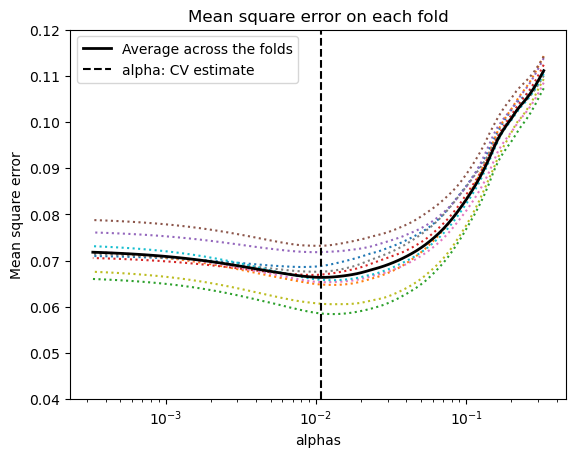

In [38]:
#Plotting the results of cross-validation with mean squared error

plt.semilogx(cv_lasso.alphas_, cv_lasso.mse_path_, ":")
plt.plot(
    cv_lasso.alphas_ ,
    cv_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    cv_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.04, 0.12
plt.ylim(ymin, ymax);

## Part 3: Random Forest

The random forest is a type of CART (classification and regression tree) that uses bagging (bootstrap aggregation) to reduce overfitting and improve performance. It grows multiple trees and combines the predictions made by these trees for increased accuracy.

The decision trees are trained on different subsets of the data, with random subsets of the features used for each tree. Each tree then votes on the final prediction, with the most common prediction being selected as the final output. This makes the model robust against overfitting to the data, outliers and missing data.

<br>
<br>

**Step 1:** We will begin by importing the relevant functions and defining a base model with [random_state=10] for reproducibility

In [39]:
#Build the model using previously split data and import functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

#Define the random forest model
rf = RandomForestClassifier(random_state=10)

<br>

**Step 2:** Next, we will define a grid of hyperparameters to be tuned using grid search for the random forest.

In a random forest, hyperparameters are used to control how the model is built. The three we will tune for this exercise include:

    1. [n_estimators] 
    2. [max_features]
    3. [min_samples_leaf]
    
What do these hyperparameters control?

<br>

**Exercise 3.1** Define the hyperparameter ranges to be include in the grid search and repeat the model building process with different parameters to see the effect this has on the model

In [40]:
#Define the hyperparameters to be used in the grid search
param_grid = {
    'n_estimators': [25, 50, 100],  #no. of trees to build
    'max_features': ['sqrt', 'log2'], #no. of features randomly selected at each split
    'min_samples_leaf': [4, 10, 25], #minimum no. of samples at terminal nodes (leaf) - allows asymmetric splits whilst balancing overfitting
}


The general rule for number of features selected at each split is listed below. 

For classification: this is the sqrt (total no. features)

For regression: total no. features / 3

**Exercise 3.2** Define the cross-validation approach using [RepeatedStratifiedKFold] 

In [41]:
#Define the cross-validation approach: repeated stratified k fold 
#stratified represents the class imbalance of the data in the k splits 
#repeats cv several times and averages result - better performance measure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

**Exercise 3.3** Construct the GridSearchCV object stating the model type, parameters, cross validation approach and scoring metric 

In [42]:
#Bring together the model and cv method into the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')

#n_jobs = -1 allows all cores to be used during model building

Here we are just converting the outcome from dummy variables back into an 1d array object, which is required by the algorithm

In [43]:
#Convert multilabel y variable back to 1d array due to package requirement
y_train_rf = pd.from_dummies(y_train)

y_train_rf.head()

,
0,claudinlow
1,Normal
2,LumB
3,LumB
4,LumB


**Exercise 3.4** Fit the grid search object to the training data. 

Hint: use the nested function [.values.ravel()] for the outcome variable so it complies with requirements of the algorithm

In [56]:
#Fit the grid search hyperparameter model to our data - using ravel.() to flattened the y variable 
grid_search.fit(X_train, y_train_rf.values.ravel())

/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=10),
             estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 10, 25],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

The grid search objected has now been fitted and validated using cv. Note the warning message above. 

Why is this the case and will it have a big impact on our model?

**Exercise 3.5** Output the best hyperparameters found through grid search and cross validation, and the mean cross-validated score of the best estimator

In [45]:
#Output the best hyperparameters and the mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}
Best score:  0.7236436937406595


<br>

**Step 3:** Update the random forest classifier with the parameters found through GridSearchCV
    
<br>

**Exercise 3.6** Fit the tuned rf to the training data

**Exercise 3.7** Use the tuned rf to make predictions on the test data 

**Exercise 3.8** Use [classification_report] to evaluate the performance metrics of the model

**What do the metrics mean and what are the advantages/disadvantages of using them to evaluate performance?**

In [46]:
#Update the model with the best parameters found 
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 4, n_estimators = 100)

#Use the tuned rf to predict on test data
rf.fit(X_train, y_train_rf.values.ravel())

#Store the predictions in a separate variable
y_pred_rf = rf.predict(X_test)
y_test_rf = pd.from_dummies(y_test)

#Output the predictive performance on the test data 
print(classification_report(y_pred_rf, y_test_rf))

              precision    recall  f1-score   support

       Basal       0.87      0.74      0.80        65
        Her2       0.56      0.78      0.65        54
        LumA       0.86      0.72      0.78       266
        LumB       0.79      0.71      0.75       145
          NC       0.00      0.00      0.00         0
      Normal       0.21      0.64      0.32        14
  claudinlow       0.66      0.88      0.75        50

    accuracy                           0.74       594
   macro avg       0.56      0.64      0.58       594
weighted avg       0.79      0.74      0.75       594



/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here a simple confusion matrix can also be constructed to get a brief overview of the predictions made

In [47]:
#Confusion matrix of the predictions and observed data
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_mat)

[[ 48   5   0   0   0   0   2]
 [  3  42  13  17   0   0   0]
 [  0   2 191  22   0   4   2]
 [  0   0  28 103   0   0   0]
 [  0   0   2   0   0   0   0]
 [  0   4  27   1   0   9   2]
 [ 14   1   5   2   0   1  44]]


**Step 4:** Plot the most important features in the model - this tells us the genes that were most important in predicting breast cancer subtype 

The code below defines a custom colour gradient function for the bar plot

In [48]:
#Define colour gradient functions
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


**Exercise 3.9** Identify the 50 most important predictors used in the random forest model and sort them in descending order. 

In this example, gini impurity is used to measure variable importance.

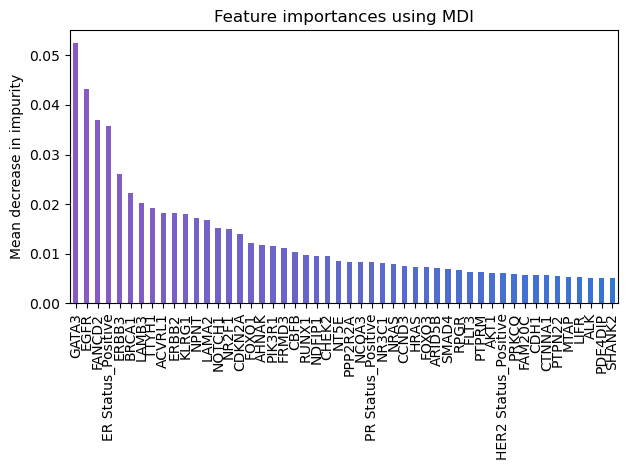

In [49]:
#Determine feature importance using mean decrease in gini impurity and plot the top 50 features
feature_names = X.columns.values.tolist()
rf_features = pd.Series(rf.feature_importances_, index=feature_names)
rf_features.sort_values(ascending = False , inplace = True)

color1 = "#8A5AC2"
color2 = "#3575D5"

fig, ax = plt.subplots()
rf_features[0:50].plot.bar(ax=ax, color= get_color_gradient(color1, color2, 50))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Part 4: XGBoost

XGBoost (eXtreme Gradient Boosting) is an ensemble learning method that creates multiple learners and combines weak learners to improve prediction accuracy (boosting). The weak learners with poorer predictions are weighted more than better learners so the model focuses on high weighted predictions.

The parameters tuned here broadly focus on:
1. tree-specific params : as seen previously on the random forest
2. boosting params: affects boosting of the model
3. misc params: overall model operation

In [50]:
#Import relevant functions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Here a base model without any hyperparameter tuning is initialised and fit on training data to evaluate its baseline predictive performance on test data. We can see the accuracy is 60.61%. We will tune the parameters of the model next and see whether this improves predictive performance.

In [51]:
#Fit the xgboost model without tuning hyperparameters 
xgb = XGBClassifier(subsample=1,
colsample_bytree=1,
min_child_weight=1,
max_depth=6,
learning_rate=0.3,
n_estimators=100)

xgb.fit(X_train, y_train) #fit the model to the training set

xgb_pred = xgb.predict(X_test) #make predictions on the test set

accuracy_score(y_test, xgb_pred) #this is the base predictive performance

0.6060606060606061

<br>

**Step 1:** Outline the parameters for the model. The hyperparameters that we will tune here include:

<br>

***[max_depth]*** : maximum depth of a tree (controls over-fitting)

***[min_child_weight]*** : used to control over/under fitting, sets a criterion that controls whether new leaves can be added

***[subsample]*** : fraction of randomly selected observations for each tree

***[colsample_bytree]*** : subsample ratio of columns when building each tree

***[learning_rate (ETA)]*** : determines the impact each tree has on the final outcome; with xgboost there is an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.

***[n_estimators]*** : number of sequential trees modeled

Note that this is not an exhaustive list of all the parameters that can be tuned.

**Exercise 4.1** Set a list of parameters with appropriate ranges to be used for the model

In [52]:
#Set the parameters to be tuned
xgb_params = {"colsample_bytree":[0.5, 0.75, 1], "subsample" :[0.7,1],
"max_depth":[2, 6, 12], "learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[50,100], "min_child_weight":[0, 0.5, 1]}

<br>

**Step 2:** Use grid search and cross validation to tune the model parameters

<br>
    
**Exercise 4.2** Fit a new XGBoost model to use all cores with 100 different estimators

**Exercise 4.3** Use [GridSearchCV] to perform a grid search of hyperparameters

**Exercise 4.4** Fit the grid search model to the training data and output the best parameters

In [54]:
#Fit a new model
xgb_new = XGBClassifier(n_estimators=100, n_jobs=-1,random_state=10)

#Initialise the gridsearch function and output its best parameters
xgb_gs = GridSearchCV(xgb_new, param_grid = xgb_params, cv=3, 
                     scoring = "accuracy")

#Fit the gridsearch model to training data
xgb_tuned = xgb_gs.fit(X_train,y_train, verbose=0)
print(xgb_gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 0.5, 'n_estimators': 100, 'subsample': 1}


<br>

**Step 3:** Use the tuned XGBoost model to make predictions on the test data

<br>


**Exercise 4.5** Use the tuned XGBoost model to predict on the training data. What is the accuracy of the new model?

In [57]:
#Use the grid search model to predict on test data and output accuracy
xgb_tuned_pred = xgb_tuned.predict(X_test)
print('Accuracy:',accuracy_score(y_test, xgb_tuned_pred))

Accuracy: 0.6144781144781145


<br>

**Step 4:** Feature importance

<br>
    
**Exercise 4.6** Plot the top 40 most important features in the model in a bar chart

       Hint: [plot_importance] from xgboost can be used to illustrate this

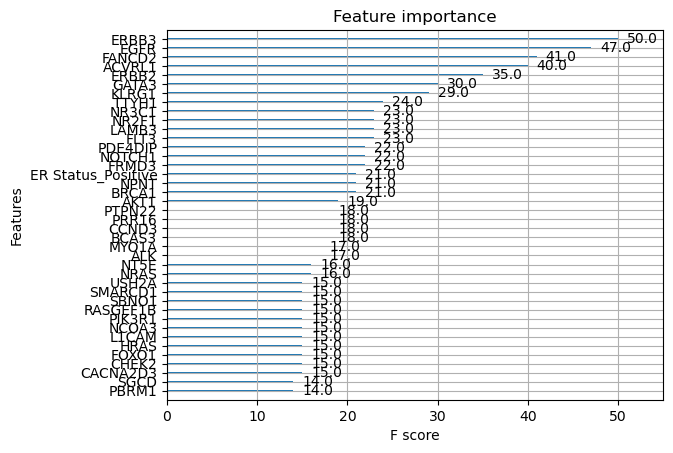

In [58]:
#Obtain feature importance from the xgboost model
from xgboost import plot_importance

plot_importance(xgb_tuned.best_estimator_, max_num_features=40)
plt.show()

## Next steps

**Exercise 2.5** Read up on one hot encoding and how categorical variables are handled in regression models

**Exercise 2.11** Read up on what metrics are commonly used to evaluate model performance and why is this different for regression vs. classification

**Exercise 3.9** Read up on gini impurity and how it is used in a random forest

**Exercise 4.3** Look into early stopping in XGBoost and why this might be used 

**Challenge** Use the 145 predictors selected from lasso regression to build a random forest and xgboost classfier. Compare the model performance using the selected predictors vs all the predictors - is there an improvement?

**Challenge** Construct ROC-AUC curves to compare the two classification models used 

<br>
<br>

Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**